# Python - Lectures
## Day 1 (June 23, 2025)

If you need installation help you can read the documentation here or ask one of the TAs.

### Building "Programs" from "Scripts" and "Functions"

Once you have a lot of commands, it will get exhausting typing them again and again (especially when you
make mistakes). Instead, you will want to use a \script". A script is a list of commands in a  le that you
can execute directly from the command window. To create a script go to the File menu and select New >
File. Now type in a few commands, such as:

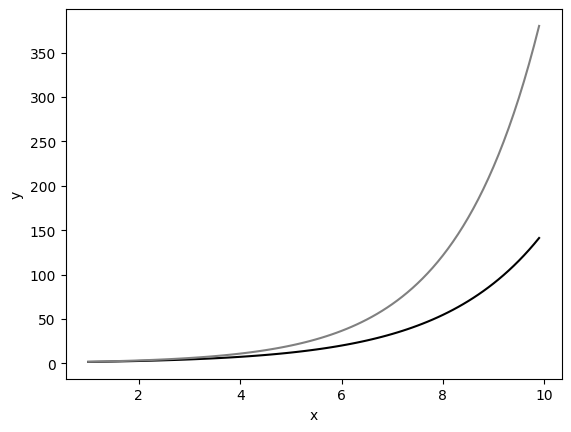

In [1]:
#my_first_file.py
import numpy as np
import matplotlib.pyplot as plt
# Create some vectors
x = np.arange(1,10,0.1)
y1 = np.exp(0.5*x)
y2 = np.exp(0.6*x)
#plot the vectors
plt.plot(x,y1,'k') #Use a black line
plt.plot(x,y2,c=[0.5,0.5,0.5]) #Use a grey line
plt.xlabel('x') #Label the axis
plt.ylabel('y')
#save the image to a file
plt.savefig('my_first.pdf',bbox_inches='tight')

The problem with this script is that changing the arguments in the exponential functions requires editing
the script and then re-running the code. It would be more convenient to designate a variable change from the
command window and have the code automatically update its output. The problem is that a script cannot
return a variable or accept a variable as input. To do so requires a "function". Functions are program  les
that can be called from the Command window, can accept inputs, and return outputs. To start one, open a
new file and type:

In [3]:
def logGrowth(N,t):
    """
    function dNdt = logGrowth(N,t)
    logGrowth gives the growth rate of a population of size N at time t
    usage: dNdt = logGrowth(N,t)
    """
    r = 0.5
    K = 100
    dNdt = r*N*(1-N/K)
    return dNdt

Now the new function can be accessed just like one of Python's built-in functions, for example, type the
following code into a new  le named \Lab1_Functions". Note that to use code from another  le, import the  le

Text(0, 0.5, 'dN/dt')

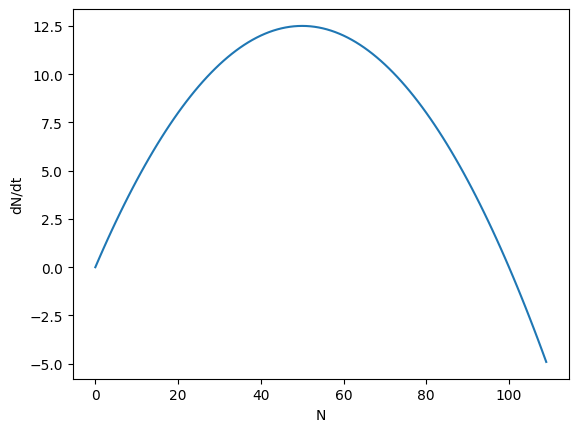

In [6]:

import numpy as np
import matplotlib.pyplot as plt

vN = np.arange(0,110)
plt.plot(vN,logGrowth(vN,0))
plt.xlabel('N')
plt.ylabel('dN/dt')

This gives an upside down parabola, denoting that growth rate is positive between 0 and 100 and negative
when N is greater than 100. Note that the argument t is not used in the logGrowth function. Not all inputs
have to be used. We will update this function later to both accept and utilize all inputs.

### Numerically Integrating Differential Equations

You may decide to use Python to numerically solve di erential equations, like the logistic growth equation,
even when such solutions are not available analytically. But, in many cases, such solutions are not available
analytically, and hence we must use such techniques to help build intuition. The most-used Python program
which does the integration is called integrate.odeint from the scipy package. Here is a script that integrates
the logGrowth function.

Text(0.5, 1.0, 'Logisitic model')

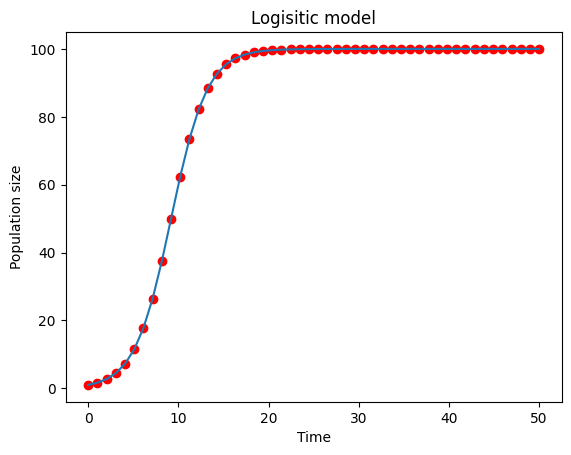

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#Numerical solution of the logisitic equation
t0 = 0 # Initial time
tf = 50 # Final time
N0 = 1 # Initial population size
T = np.linspace(t0,tf) # time steps to report
vNint = integrate.odeint(logGrowth,N0,T)
# Actual solution
r = 0.5
K = 100
vNact = (N0*np.exp(r*T))/(1+N0*(np.exp(r*T)-1)/K) # Actual solution
# Plot results
plt.plot(T,vNint) # Plot numerically integrated solution
plt.scatter(T,vNact,color='red') # Plot actual solution
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Logisitic model')